# Разработка системы распознавания предметов интерьера в потоковом видео
## Часть 6: Метрики

In [1]:
%matplotlib inline

#System
import os
import shutil

#Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from skimage.io import imread, imshow, imsave


#Seed
seed = 99
np.random.seed(seed)
random.seed(seed)

In [18]:
unet_512_1 = pd.read_csv("callbacks/Unet_512_1_06.03_23-34/logger.csv")
unet_512_2 = pd.read_csv("callbacks/Unet_512_2_06.04_03-58/logger.csv")
unet_512_3 = pd.read_csv("callbacks/Unet_512_3_06.04_09-17/logger.csv")
unet_512_4 = pd.read_csv("callbacks/Unet_512_4_06.04_16-05/logger.csv")
unet_512_5 = pd.read_csv("callbacks/Unet_512_5_06.05_00-19/logger.csv")

unet_1024_1 = pd.read_csv("callbacks/Unet_1024_1_06.03_23-34/logger.csv")
unet_1024_2 = pd.read_csv("callbacks/Unet_1024_2_06.04_04-01/logger.csv")
unet_1024_3 = pd.read_csv("callbacks/Unet_1024_3_06.04_10-11/logger.csv")
unet_1024_4 = pd.read_csv("callbacks/Unet_1024_4_06.04_18-09/logger.csv")
unet_1024_5 = pd.read_csv("callbacks/Unet_1024_5_06.05_03-48/logger.csv")

unet_2048_1 = pd.read_csv("callbacks/Unet_2048_1_06.05_19-04/logger.csv")
unet_2048_2 = pd.read_csv("callbacks/Unet_2048_2_06.06_00-27/logger.csv")
unet_2048_3 = pd.read_csv("callbacks/Unet_2048_3_06.06_17-04/logger.csv")
unet_2048_4 = pd.read_csv("callbacks/Unet_2048_4_06.05_19-16/logger.csv")
#unet_2048_5 = pd.read_csv("callbacks/Unet_2048_5_06.06_14-10/logger.csv")

unet_1024_bn = pd.read_csv("callbacks/Unet_1024_batch_norm_3_06.07_08-53/logger.csv")
unet_1024_tc = pd.read_csv("callbacks/Unet_1024_conv_trans_3_06.07_23-41/logger.csv")
unet_1024_do_01 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_01_06.07_08-44/logger.csv")
unet_1024_do_02 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_02_06.07_18-20/logger.csv")
unet_1024_do_03 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_03_06.08_03-44/logger.csv")

## IoT

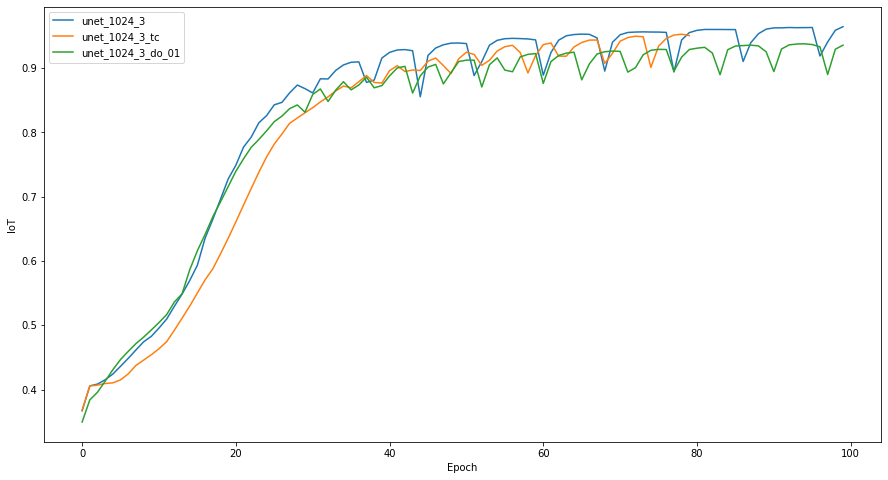

In [11]:
plt.figure(figsize=(15, 8))

# plt.plot(unet_512_1.epoch, unet_512_1.jaccard_coef, label="unet_512_1")
# plt.plot(unet_512_2.epoch, unet_512_2.jaccard_coef, label="unet_512_2")
# plt.plot(unet_512_3.epoch, unet_512_3.jaccard_coef, label="unet_512_3")
# plt.plot(unet_512_4.epoch, unet_512_4.jaccard_coef, label="unet_512_4")
# plt.plot(unet_512_5.epoch, unet_512_5.jaccard_coef, label="unet_512_5")

# plt.plot(unet_1024_1.epoch, unet_1024_1.jaccard_coef, label="unet_1024_1")
# plt.plot(unet_1024_2.epoch, unet_1024_2.jaccard_coef, label="unet_1024_2")
plt.plot(unet_1024_3.epoch, unet_1024_3.jaccard_coef, label="unet_1024_3")
# plt.plot(unet_1024_4.epoch, unet_1024_4.jaccard_coef, label="unet_1024_4")
# plt.plot(unet_1024_5.epoch, unet_1024_5.jaccard_coef, label="unet_1024_5")

# plt.plot(unet_2048_1.epoch, unet_2048_1.jaccard_coef, label="unet_2048_1")
# plt.plot(unet_2048_2.epoch, unet_2048_2.jaccard_coef, label="unet_2048_2")
# plt.plot(unet_2048_3.epoch, unet_2048_3.jaccard_coef, label="unet_2048_3")
# plt.plot(unet_2048_4.epoch, unet_2048_4.jaccard_coef, label="unet_2048_4")
# plt.plot(unet_2048_5.epoch, unet_2048_5.jaccard_coef, label="unet_2048_5")

# plt.plot(unet_1024_bn.epoch, unet_1024_bn.jaccard_coef, label="unet_1024_3_bn")
plt.plot(unet_1024_tc.epoch, unet_1024_tc.jaccard_coef, label="unet_1024_3_tc")
plt.plot(unet_1024_do_01.epoch, unet_1024_do_01.jaccard_coef, label="unet_1024_3_do_01")
# plt.plot(unet_1024_do_02.epoch, unet_1024_do_02.jaccard_coef, label="unet_1024_3_do_02")
plt.plot(unet_1024_do_03.epoch, unet_1024_do_03.jaccard_coef, label="unet_1024_3_do_03")

plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

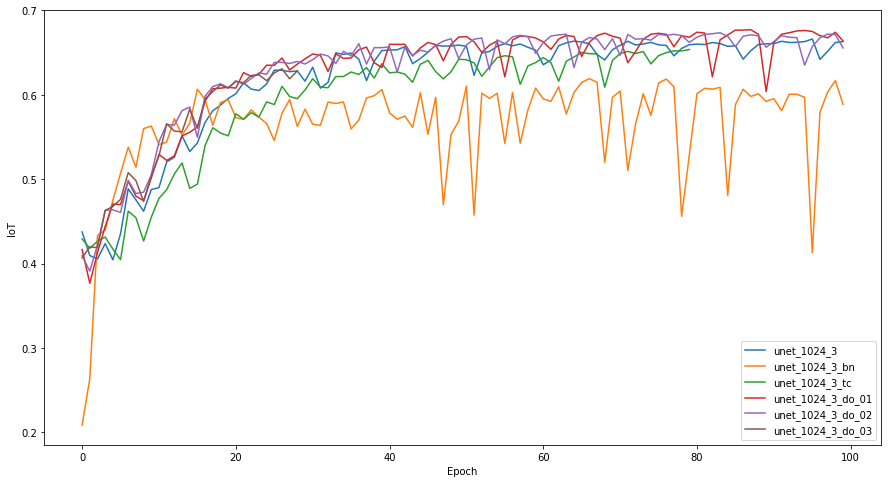

In [20]:
plt.figure(figsize=(15, 8))

# plt.plot(unet_512_1.epoch, unet_512_1.val_jaccard_coef, label="unet_512_1")
# plt.plot(unet_512_2.epoch, unet_512_2.val_jaccard_coef, label="unet_512_2")
# plt.plot(unet_512_3.epoch, unet_512_3.val_jaccard_coef, label="unet_512_3")
# plt.plot(unet_512_4.epoch, unet_512_4.val_jaccard_coef, label="unet_512_4")
# plt.plot(unet_512_5.epoch, unet_512_5.val_jaccard_coef, label="unet_512_5")

# plt.plot(unet_1024_1.epoch, unet_1024_1.val_jaccard_coef, label="unet_1024_1")
# plt.plot(unet_1024_2.epoch, unet_1024_2.val_jaccard_coef, label="unet_1024_2")
plt.plot(unet_1024_3.epoch, unet_1024_3.val_jaccard_coef, label="unet_1024_3")
# plt.plot(unet_1024_4.epoch, unet_1024_4.val_jaccard_coef, label="unet_1024_4")
# plt.plot(unet_1024_5.epoch, unet_1024_5.val_jaccard_coef, label="unet_1024_5")

# plt.plot(unet_2048_1.epoch, unet_2048_1.val_jaccard_coef, label="unet_2048_1")
# plt.plot(unet_2048_2.epoch, unet_2048_2.val_jaccard_coef, label="unet_2048_2")
# plt.plot(unet_2048_3.epoch, unet_2048_3.val_jaccard_coef, label="unet_2048_3")
# plt.plot(unet_2048_4.epoch, unet_2048_4.val_jaccard_coef, label="unet_2048_4")
# plt.plot(unet_2048_5.epoch, unet_2048_5.val_jaccard_coef, label="unet_2048_5")

plt.plot(unet_1024_bn.epoch, unet_1024_bn.val_jaccard_coef, label="unet_1024_3_bn")
plt.plot(unet_1024_tc.epoch, unet_1024_tc.val_jaccard_coef, label="unet_1024_3_tc")
plt.plot(unet_1024_do_01.epoch, unet_1024_do_01.val_jaccard_coef, label="unet_1024_3_do_01")
plt.plot(unet_1024_do_02.epoch, unet_1024_do_02.val_jaccard_coef, label="unet_1024_3_do_02")
plt.plot(unet_1024_do_03.epoch, unet_1024_do_03.val_jaccard_coef, label="unet_1024_3_do_03")

#plt.ylim((0.55, 0.68))
plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

### Зависимость времени работы от числа параметров модели

In [22]:
unet_512_1_time = float(open("callbacks/Unet_512_1_06.03_23-34/time.txt").read())
unet_512_2_time = float(open("callbacks/Unet_512_2_06.04_03-58/time.txt").read())
unet_512_3_time = float(open("callbacks/Unet_512_3_06.04_09-17/time.txt").read())
unet_512_4_time = float(open("callbacks/Unet_512_4_06.04_16-05/time.txt").read())
unet_512_5_time = float(open("callbacks/Unet_512_5_06.05_00-19/time.txt").read())

unet_1024_1_time = float(open("callbacks/Unet_1024_1_06.03_23-34/time.txt").read())
unet_1024_2_time = float(open("callbacks/Unet_1024_2_06.04_04-01/time.txt").read())
unet_1024_3_time = float(open("callbacks/Unet_1024_3_06.04_10-11/time.txt").read())
unet_1024_4_time = float(open("callbacks/Unet_1024_4_06.04_18-09/time.txt").read())
unet_1024_5_time = float(open("callbacks/Unet_1024_5_06.05_03-48/time.txt").read())

unet_2048_1_time = float(open("callbacks/Unet_2048_1_06.05_19-04/time.txt").read())
unet_2048_2_time = float(open("callbacks/Unet_2048_2_06.06_00-27/time.txt").read())
unet_2048_3_time = float(open("callbacks/Unet_2048_3_06.06_17-04/time.txt").read())
unet_2048_4_time = float(open("callbacks/Unet_2048_4_06.05_19-16/time.txt").read())
#unet_2048_5_time = float(open("callbacks/Unet_2048_5_06.06_14-10/time.txt").read())

unet_1024_bn_time = float(open("callbacks/Unet_1024_batch_norm_3_06.07_08-53/time.txt").read())
unet_1024_do_01_time = float(open("callbacks/Unet_1024_dropout_3_dp_01_06.07_08-44/time.txt").read())
unet_1024_do_02_time = float(open("callbacks/Unet_1024_dropout_3_dp_02_06.07_18-20/time.txt").read())
#unet_1024_do_03_time = float(open("callbacks/Unet_1024_dropout_3_dp_03_06.08_03-44/time.txt").read())
#unet_1024_tc_time = float(open("callbacks/Unet_1024_conv_trans_3_06.07_23-41/time.txt").read())

In [23]:
unet_512_1_param = float(open("callbacks/Unet_512_1_06.03_23-34/param_count.txt").read())
unet_512_2_param = float(open("callbacks/Unet_512_2_06.04_03-58/param_count.txt").read())
unet_512_3_param = float(open("callbacks/Unet_512_3_06.04_09-17/param_count.txt").read())
unet_512_4_param = float(open("callbacks/Unet_512_4_06.04_16-05/param_count.txt").read())
unet_512_5_param = float(open("callbacks/Unet_512_5_06.05_00-19/param_count.txt").read())

unet_1024_1_param = float(open("callbacks/Unet_1024_1_06.03_23-34/param_count.txt").read())
unet_1024_2_param = float(open("callbacks/Unet_1024_2_06.04_04-01/param_count.txt").read())
unet_1024_3_param = float(open("callbacks/Unet_1024_3_06.04_10-11/param_count.txt").read())
unet_1024_4_param = float(open("callbacks/Unet_1024_4_06.04_18-09/param_count.txt").read())
unet_1024_5_param = float(open("callbacks/Unet_1024_5_06.05_03-48/param_count.txt").read())

unet_2048_1_param = float(open("callbacks/Unet_2048_1_06.05_19-04/param_count.txt").read())
unet_2048_2_param = float(open("callbacks/Unet_2048_2_06.06_00-27/param_count.txt").read())
unet_2048_3_param = float(open("callbacks/Unet_2048_3_06.06_17-04/param_count.txt").read())
unet_2048_4_param = float(open("callbacks/Unet_2048_4_06.05_19-16/param_count.txt").read())
#unet_2048_5_param = float(open("callbacks/Unet_2048_5_06.06_14-10/param_count.txt").read())

unet_1024_bn_time = float(open("callbacks/Unet_1024_batch_norm_3_06.07_08-53/param_count.txt").read())
unet_1024_do_01_time = float(open("callbacks/Unet_1024_dropout_3_dp_01_06.07_08-44/param_count.txt").read())
unet_1024_do_02_time = float(open("callbacks/Unet_1024_dropout_3_dp_02_06.07_18-20/param_count.txt").read())
#unet_1024_do_03_time = float(open("callbacks/Unet_1024_dropout_3_dp_03_06.08_03-44/param_count.txt").read())
#unet_1024_tc_time = float(open("callbacks/Unet_1024_conv_trans_3_06.07_23-41/param_count.txt").read())

In [24]:
unet_512_1_max = unet_512_1.val_jaccard_coef.max()
unet_512_2_max = unet_512_2.val_jaccard_coef.max()
unet_512_3_max = unet_512_3.val_jaccard_coef.max()
unet_512_4_max = unet_512_4.val_jaccard_coef.max()
unet_512_5_max = unet_512_5.val_jaccard_coef.max()

unet_1024_1_max = unet_1024_1.val_jaccard_coef.max()
unet_1024_2_max = unet_1024_2.val_jaccard_coef.max()
unet_1024_3_max = unet_1024_3.val_jaccard_coef.max()
unet_1024_4_max = unet_1024_4.val_jaccard_coef.max()
unet_1024_5_max = unet_1024_5.val_jaccard_coef.max()

unet_2048_1_max = unet_2048_1.val_jaccard_coef.max()
unet_2048_2_max = unet_2048_2.val_jaccard_coef.max()
unet_2048_3_max = unet_2048_3.val_jaccard_coef.max()
unet_2048_4_max = unet_2048_4.val_jaccard_coef.max()
#unet_2048_5_max = unet_2048_5.val_jaccard_coef.max()

unet_1024_bn_max = unet_1024_bn.val_jaccard_coef.max()
unet_1024_do_01_max = unet_1024_do_01.val_jaccard_coef.max()
unet_1024_do_02_max = unet_1024_do_02.val_jaccard_coef.max()
unet_1024_do_03_max = unet_1024_do_03.val_jaccard_coef.max()
unet_1024_tc_max = unet_1024_tc.val_jaccard_coef.max()

In [25]:
unet_1024_3_max

0.6660227179527283

In [26]:
unet_1024_bn_max

0.619131326675415

In [27]:
unet_1024_do_01_max

0.6770724058151245

In [28]:
unet_1024_do_02_max

0.6734520196914673

In [29]:
unet_1024_do_03_max

0.6307229399681091

In [30]:
unet_1024_tc_max

0.6536062955856323

In [53]:
time_512 = [unet_512_1_time, unet_512_2_time, unet_512_3_time, unet_512_4_time, unet_512_5_time]
time_1024 = [unet_1024_1_time, unet_1024_2_time, unet_1024_3_time, unet_1024_4_time, unet_1024_5_time]
#time_2048 = [unet_2048_1_time, unet_2048_2_time, unet_2048_3_time, unet_2048_4_time, unet_2048_5_time]
#time_2048 = [unet_2048_1_time, unet_2048_2_time, unet_2048_3_time, unet_2048_4_time]

param_512 = [unet_512_1_param, unet_512_2_param, unet_512_3_param, unet_512_4_param, unet_512_5_param]
param_1024 = [unet_1024_1_param, unet_1024_2_param, unet_1024_3_param, unet_1024_4_param, unet_1024_5_param]
#param_2048 = [unet_2048_1_param, unet_2048_2_param, unet_2048_3_param, unet_2048_4_param, unet_2048_5_param]
#param_2048 = [unet_2048_1_param, unet_2048_2_param, unet_2048_4_param]

max_iot_512 = [unet_512_1_max, unet_512_2_max, unet_512_3_max, unet_512_4_max, unet_512_5_max]
max_iot_1024 = [unet_1024_1_max, unet_1024_2_max, unet_1024_3_max, unet_1024_4_max, unet_1024_5_max]
#max_iot_2048 = [unet_2048_1_max, unet_2048_2_max, unet_2048_3_max, unet_2048_5_max]
#max_iot_2048 = [unet_2048_1_max, unet_2048_2_max, unet_2048_4_max]

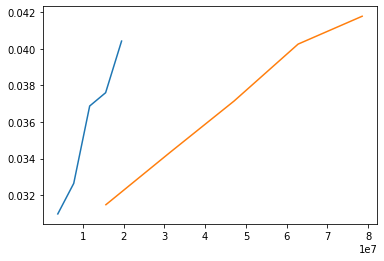

In [54]:
plt.plot(param_512, time_512)
plt.plot(param_1024, time_1024)
#plt.plot(param_2048, time_2048)

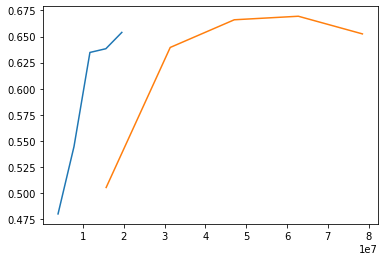

In [55]:
plt.plot(param_512, max_iot_512)
plt.plot(param_1024, max_iot_1024)
#plt.plot(param_2048, max_iot_2048)

Text(0, 0.5, 'max iot')

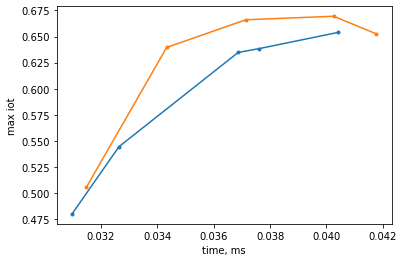

In [58]:
plt.plot(time_512, max_iot_512, ".-")
plt.plot(time_1024, max_iot_1024, ".-")
#plt.plot(time_2048, max_iot_2048, ".-")
plt.xlabel("time, ms")
plt.ylabel("max iot")

In [51]:
max_iot_512

[0.4801257252693176,
 0.5445794463157654,
 0.6347441673278809,
 0.6383118629455566,
 0.6539323329925537]

In [49]:
max_iot_1024

[0.5054338574409485,
 0.6395273804664612,
 0.6660227179527283,
 0.6694062948226929,
 0.6525040864944458]

In [50]:
max_iot_2048

[0.5586171150207521, 0.663223147392273, 0.67570561170578, 0.6332576870918274]